<a href="https://colab.research.google.com/github/KashishChanana/OneFourthLabs/blob/master/MPNeuron_%7C_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

In [0]:
breast_cancer= sklearn.datasets.load_breast_cancer()

In [0]:
X= breast_cancer.data
Y=breast_cancer.target

In [0]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [0]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd
data= pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)

In [0]:
data['class']= breast_cancer.target

In [0]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [0]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [0]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
# .target, .data , .feature_names , .target_names

In [0]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Train test split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X= data.drop('class', axis=1)
Y= data['class']

In [0]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.1)

In [0]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(569, 30) (512, 30) (57, 30)
(569,) (512,) (57,)


In [0]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.6328125 0.5789473684210527


In [0]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.1, stratify=Y)

In [0]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [0]:
print(X.mean(), X_train.mean(), X_test.mean())

In [0]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

# Binarisation

In [0]:
X_binarised_train= X_train.apply(pd.cut, bins=2, labels=[1,0])
X_binarised_test= X_test.apply(pd.cut, bins=2, labels=[1,0])

In [0]:
X_binarised_train= X_binarised_train.values
X_binarised_test= X_binarised_test.values




# MP Model

0 62.6953125
1 62.6953125
2 62.6953125
3 62.6953125
4 62.6953125
5 62.6953125
6 62.6953125
7 62.6953125
8 62.6953125
9 62.6953125
10 62.6953125
11 62.6953125
12 62.6953125
13 62.5
14 62.3046875
15 62.3046875
16 61.71875
17 61.328125
18 61.5234375
19 61.1328125
20 61.1328125
21 61.328125
22 60.7421875
23 61.328125
24 60.7421875
25 59.1796875
26 58.984375
27 58.7890625
28 56.4453125
29 53.125


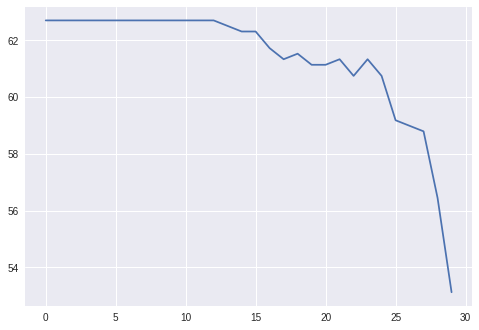

In [0]:
value={}
for b in range(X_binarised_train.shape[1]):
  y_predictions=[]
  accurate_rows=0
  for x, y in zip(X_binarised_train, Y_train):
    y_pred= (np.sum(x)>=b)
    y_predictions.append(y_pred)
    accurate_rows+= (y==y_pred)
  value[b]=accurate_rows/X_binarised_train.shape[0]*100
for key in value:
  print(key, value[key])
plt.plot(value.values())
plt.show()
  

In [0]:
b=28
y_predictions=[]
accurate_rows=0

for x, y in zip(X_binarised_train, Y_train):
  y_pred= (np.sum(x)>=b)
  y_predictions.append(y_pred)
  
  accurate_rows+= (y==y_pred)
print(accurate_rows, accurate_rows/X_binarised_train.shape[0])
  

435 0.849609375


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
Y_test_pred=[]
b=28

for x in X_binarised_test:
  y_pred= (np.sum(x)>=b)
  Y_test_pred.append(y_pred)
  
print(accuracy_score(Y_test_pred, Y_test))
  

0.8596491228070176


# MP Class

In [0]:
class MP_Neuron:
  
  def __init__(self):
    self.b=None
    
  def model(self, x):
    return (sum(x) >=self.b)
  
  def predict(self, X):
    Y=[]
    for x in X:
      Y.append(self.model(x))
    return np.array(Y)
  
  def fit(self, X, Y):
    y_pred=[]
    max_accuracy=0
    optimum_b=0
    for b in range(X.shape[1]):
      self.b=b
      y_pred=self.predict(X)
      accuracy= accuracy_score(y_pred, Y)
      if(accuracy>max_accuracy):
        max_accuracy=accuracy
        optimum_b=b
    print(optimum_b, max_accuracy)
    self.b=optimum_b
      

In [0]:
mp=MP_Neuron()

In [0]:
mp.fit(X_binarised_train, Y_train)

27 0.849609375


In [0]:
Y_pred=mp.predict(X_binarised_test)
accuracy= accuracy_score(Y_pred, Y_test)
print(accuracy)

0.8947368421052632


# Perceptron

In [0]:
class Perceptron:
  
  def __init__(self):
    self.w= None
    self.b= None
  
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    y=[]
    for x in X:
      y.append(self.model(x))
    return np.array(y)
  
  def fit(self, X, Y, epochs=2, lr=1):
      self.w= np.ones(X.shape[1])
      self.b=0
      
      acc={}
      max_acc=0
      for i in range(epochs):
        for x, y in zip(X, Y):
          y_pred= self.model(x)
          if y==1 and y_pred==0:
            self.w= self.w+ x*lr
            self.b= self.b- 1*lr
          elif y==0 and y_pred==1:
            self.w= self.w- x*lr
            self.b= self.b+ 1*lr
          acc[i]= accuracy_score(self.predict(X), Y)
          if(acc[i]>max_acc):
            max_acc=acc[i]
            optimum_w=self.w
            optimum_b=self.b
            
    
      plt.plot(acc.values())
      plt.show()
      self.w=optimum_w
      self.b=optimum_b
        
    
  
  

In [0]:
perceptron= Perceptron()

In [0]:
X_train= X_train.values
Y_train=Y_train.values
X_test= X_test.values
Y_test=Y_test.values

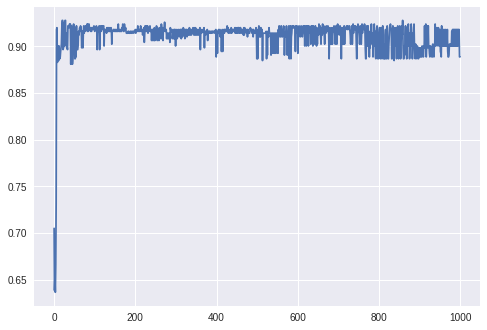

In [0]:
perceptron.fit(X_train, Y_train, 1000, 0.001)

In [0]:
y_pred= perceptron.predict(X_train)

In [0]:
accuracy= accuracy_score(y_pred, Y_train)
print(accuracy)

0.939453125


In [0]:
y_pred= perceptron.predict(X_test)
accuracy= accuracy_score(y_pred, Y_test)

In [0]:
print(accuracy)

0.9122807017543859
